In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest , f_regression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import linear_model
from tensorflow import keras
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neural_network import MLPRegressor

In [ ]:
data = pd.read_csv("train.csv")

In [ ]:
features = pd.read_csv("features.csv")
features = features.drop(['MarkDown1'],axis=1)
features = features.drop(['MarkDown2'],axis=1)
features = features.drop(['MarkDown3'],axis=1)
features = features.drop(['MarkDown4'],axis=1)
features = features.drop(['MarkDown5'],axis=1)
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   CPI           7605 non-null   float64
 5   Unemployment  7605 non-null   float64
 6   IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(4), int64(1), object(1)
memory usage: 392.0+ KB


In [ ]:
stores = pd.read_csv("stores.csv")
stores.info()
stores.head()
uniqueTypes = stores['Type'].unique()
print(uniqueTypes)
stores["Type"] = stores['Type'].map({'A': 1,'B': 2,'C':3})
stores.head()
## store sizes, type A > 150000, type B = 50000-150000, type C < 50000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB
['A' 'B' 'C']


,Store,Type,Size
0,1,1,151315
1,2,1,202307
2,3,2,37392
3,4,1,205863
4,5,2,34875


In [ ]:
dataset = pd.DataFrame(data)

# Get unique store and date combinations
unique_stores = dataset['Store'].unique()
unique_dates = dataset['Date'].unique()

# Create an empty DataFrame to store results
results = pd.DataFrame(columns=['Store', 'Date', 'Total_Weekly_Sales'])

# Iterate through each store and date combination
for store in unique_stores:
    for date in unique_dates:
        # Calculate total weekly sales for each store and date
        total_sales = dataset[(dataset["Store"] == store) & (dataset['Date'] == date)]['Weekly_Sales'].sum()
        currentResult =pd.DataFrame({'Store': store, 'Date': date, 'Total_Weekly_Sales': total_sales}, index=[0])

        # Append results to the DataFrame
        results = pd.concat([results,currentResult], ignore_index=True)

# Displaying the resulting DataFrame
print(results)

     Store        Date  Total_Weekly_Sales
0        1  2010-02-05          1643690.90
1        1  2010-02-12          1641957.44
2        1  2010-02-19          1611968.17
3        1  2010-02-26          1409727.59
4        1  2010-03-05          1554806.68
...    ...         ...                 ...
6430    45  2012-09-28           713173.95
6431    45  2012-10-05           733455.07
6432    45  2012-10-12           734464.36
6433    45  2012-10-19           718125.53
6434    45  2012-10-26           760281.43

[6435 rows x 3 columns]


In [ ]:
#print(dataset[dataset["Store"] == 1][dataset['Date'] == '2010-02-05']['Weekly_Sales'].sum())
#print(dataset[dataset["Store"] == 1][dataset['Date'] == '2010-02-12']['Weekly_Sales'].sum())
#print(dataset[dataset["Store"] == 1][dataset['Date'] == '2010-02-19']['Weekly_Sales'].sum())

In [ ]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Store               6435 non-null   object 
 1   Date                6435 non-null   object 
 2   Total_Weekly_Sales  6435 non-null   float64
dtypes: float64(1), object(2)
memory usage: 150.9+ KB


In [ ]:

# Convert 'Date' column to datetime format if it's not already
results['Date'] = pd.to_datetime(results['Date'])

# Sort the DataFrame by 'Date' and 'Store' columns
dataset_sorted = results.sort_values(by=['Date', 'Store'])

# Display the restructured DataFrame
print(dataset_sorted)

     Store       Date  Total_Weekly_Sales
0        1 2010-02-05          1643690.90
143      2 2010-02-05          2136989.46
286      3 2010-02-05           461622.22
429      4 2010-02-05          2135143.87
572      5 2010-02-05           317173.10
...    ...        ...                 ...
5862    41 2012-10-26          1316542.59
6005    42 2012-10-26           514756.08
6148    43 2012-10-26           587603.55
6291    44 2012-10-26           361067.07
6434    45 2012-10-26           760281.43

[6435 rows x 3 columns]


In [ ]:

# Convert 'Date' column to datetime format if it's not already
features['Date'] = pd.to_datetime(features['Date'])

# Sort the DataFrame by 'Date' and 'Store' columns
features_sorted = features.sort_values(by=['Date', 'Store'])

# Display the restructured DataFrame
print(features_sorted)

      Store       Date  Temperature  Fuel_Price         CPI  Unemployment  \
0         1 2010-02-05        42.31       2.572  211.096358         8.106   
182       2 2010-02-05        40.19       2.572  210.752605         8.324   
364       3 2010-02-05        45.71       2.572  214.424881         7.368   
546       4 2010-02-05        43.76       2.598  126.442065         8.623   
728       5 2010-02-05        39.70       2.572  211.653972         6.566   
...     ...        ...          ...         ...         ...           ...   
7461     41 2013-07-26        67.56       3.582         NaN           NaN   
7643     42 2013-07-26        83.32       3.865         NaN           NaN   
7825     43 2013-07-26        79.13       3.620         NaN           NaN   
8007     44 2013-07-26        83.62       3.669         NaN           NaN   
8189     45 2013-07-26        76.06       3.804         NaN           NaN   

      IsHoliday  
0         False  
182       False  
364       False  
546

In [ ]:
results['Total_Weekly_Sales']

0       1643690.90
1       1641957.44
2       1611968.17
3       1409727.59
4       1554806.68
           ...    
6430     713173.95
6431     733455.07
6432     734464.36
6433     718125.53
6434     760281.43
Name: Total_Weekly_Sales, Length: 6435, dtype: float64

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzu6mppp2/cms67fwz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzu6mppp2/mabc2rbz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6402', 'data', 'file=/tmp/tmpzu6mppp2/cms67fwz.json', 'init=/tmp/tmpzu6mppp2/mabc2rbz.json', 'output', 'file=/tmp/tmpzu6mppp2/prophet_model9f3uxl7d/prophet_model-20231208201725.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:17:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:17:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


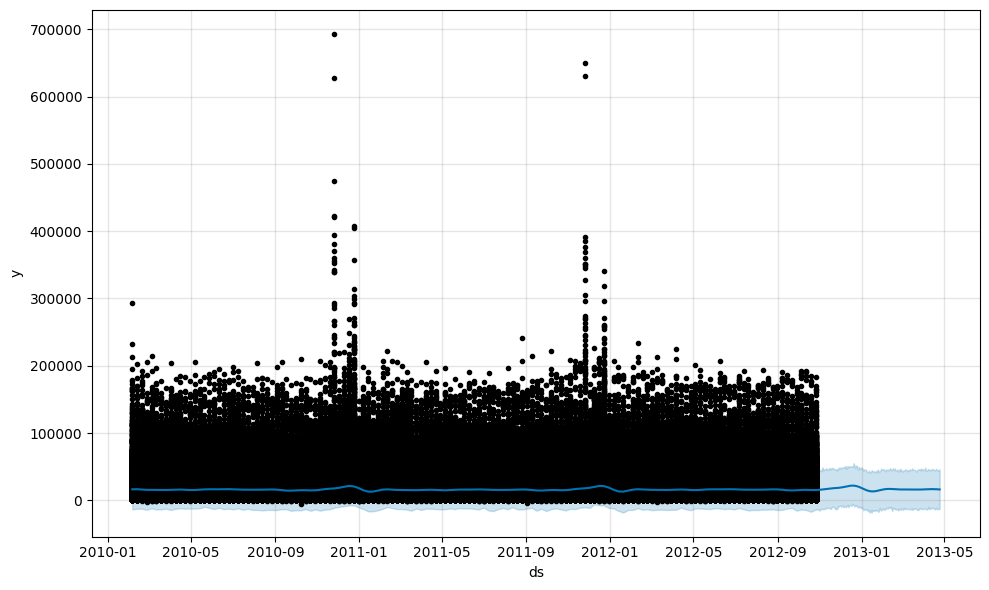

In [ ]:
from prophet import Prophet

# Assuming 'dataset' has 'Date' and 'Weekly_Sales' columns
# Rename columns as 'ds' (Date) and 'y' (Sales) for Prophet
data = dataset.rename(columns={'Date': 'ds', 'Weekly_Sales': 'y'})

# Initialize Prophet model
model = Prophet()

# Fit the model
model.fit(data)

# Make future predictions (for, e.g., the next 6 months)
future = model.make_future_dataframe(periods=180)
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzu6mppp2/7af2xl0r.json


      Store       Date  Temperature  Fuel_Price         CPI  Unemployment  \
0         1 2010-02-05        42.31       2.572  211.096358         8.106   
182       2 2010-02-05        40.19       2.572  210.752605         8.324   
364       3 2010-02-05        45.71       2.572  214.424881         7.368   
546       4 2010-02-05        43.76       2.598  126.442065         8.623   
728       5 2010-02-05        39.70       2.572  211.653972         6.566   
...     ...        ...          ...         ...         ...           ...   
5628     31 2013-04-26        58.66       3.417  224.802531         6.112   
5810     32 2013-04-26        41.42       3.568  201.070571         6.953   
5992     33 2013-04-26        76.55       3.889  132.716097         6.698   
6174     34 2013-04-26        58.54       3.397  132.716097         8.796   
6356     35 2013-04-26        50.88       3.615  143.220074         8.360   

      IsHoliday  Total_Weekly_Sales  
0         False          1643690.90  

DEBUG:cmdstanpy:input tempfile: /tmp/tmpzu6mppp2/mgay26et.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28217', 'data', 'file=/tmp/tmpzu6mppp2/7af2xl0r.json', 'init=/tmp/tmpzu6mppp2/mgay26et.json', 'output', 'file=/tmp/tmpzu6mppp2/prophet_model67j3qrzb/prophet_model-20231208201801.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:18:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:18:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Walmarts forecast is              ds         trend     yhat_lower    yhat_upper   trend_lower  \
0   2010-02-05  1.053033e+06  342785.496423  1.741262e+06  1.053033e+06   
1   2010-02-12  1.052066e+06  319229.987073  1.744194e+06  1.052066e+06   
2   2010-02-19  1.051099e+06  354472.391441  1.798659e+06  1.051099e+06   
3   2010-02-26  1.050133e+06  334372.915720  1.777200e+06  1.050133e+06   
4   2010-03-05  1.049166e+06  370458.338533  1.751457e+06  1.049166e+06   
..         ...           ...            ...           ...           ...   
344 2013-10-19  9.609632e+05  156415.909012  1.627528e+06  9.509220e+05   
345 2013-10-20  9.607395e+05  153535.610464  1.629360e+06  9.505790e+05   
346 2013-10-21  9.605159e+05  211737.368559  1.667693e+06  9.502733e+05   
347 2013-10-22  9.602922e+05  185114.611381  1.625823e+06  9.499716e+05   
348 2013-10-23  9.600686e+05  228403.878762  1.576739e+06  9.496034e+05   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper

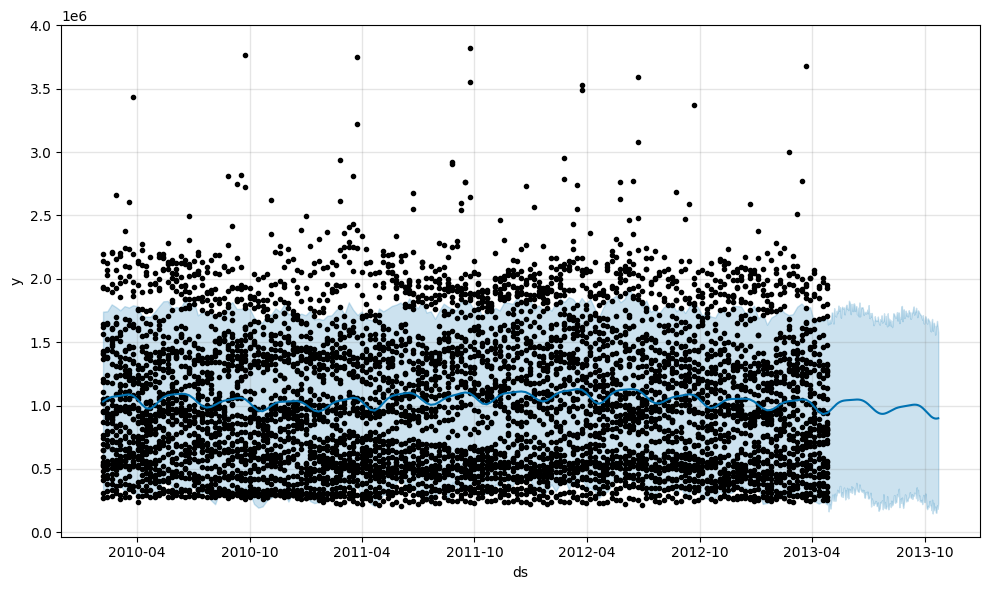

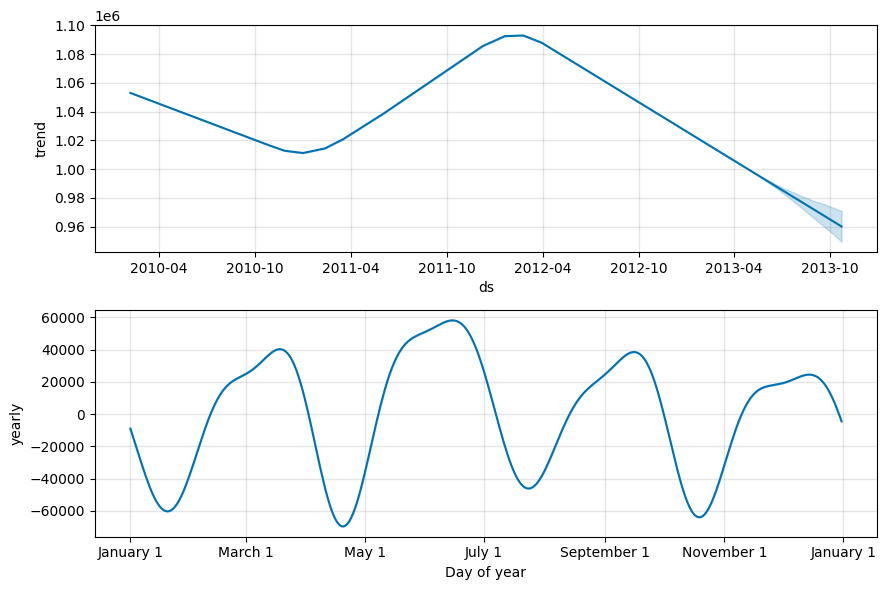

In [ ]:

features_sorted['Total_Weekly_Sales'] = dataset_sorted['Total_Weekly_Sales']
features_sorted = features_sorted.dropna()
# Displaying the updated dataset2
print(features_sorted)


#================================================================================================


from prophet import Prophet

# Assuming 'dataset' has 'Date' and 'Weekly_Sales' columns
# Rename columns as 'ds' (Date) and 'y' (Sales) for Prophet
data = features_sorted.rename(columns={'Date': 'ds', 'Total_Weekly_Sales': 'y'})

# Initialize Prophet model
model = Prophet()

# Fit the model
model.fit(data)

# Make future predictions (for, e.g., the next 6 months)
future = model.make_future_dataframe(periods=180)
forecast = model.predict(future)
print("Walmarts forecast is ", forecast)
# Plot the forecast
fig = model.plot(forecast)
fig2 = model.plot_components(forecast)

from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, forecast)
plot_components_plotly(model, forecast)

help(Prophet)

#percentage = model.score(x_testNorm, y_tests)
#print("Percentage =",percentage)
#================================================================================================


y_train = features_sorted['Total_Weekly_Sales']
x_train = features_sorted.drop(['Total_Weekly_Sales'],axis= 1)
print(x_train)

# Assuming 'date_column' is the name of your date column in the DataFrame
features_sorted['Date'] = pd.to_datetime(features_sorted['Date'])  # Convert to datetime

# Define a reference date (adjust as needed)
reference_date = pd.to_datetime('2010-02-05')

# Calculate the difference in days between each date and the reference date
x_train['numeric_date'] = (features_sorted['Date'] - reference_date).dt.days
x_train = x_train.drop(['Date'],axis= 1)
x_train = x_train.drop(['numeric_date'],axis=1)

# Display the updated DataFrame
print(x_train)
print(y_train)


#==================================================================================================

X_train, X_test, y_trains, y_tests = train_test_split(x_train, y_train, test_size=0.2, random_state=1)
x_trainNorm = StandardScaler().fit_transform(X_train)
x_testNorm = StandardScaler().fit_transform(X_test)

#================================================================================================

In [ ]:
x_train.info()
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5980 entries, 0 to 6356
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         5980 non-null   int64  
 1   Temperature   5980 non-null   float64
 2   Fuel_Price    5980 non-null   float64
 3   CPI           5980 non-null   float64
 4   Unemployment  5980 non-null   float64
 5   IsHoliday     5980 non-null   bool   
dtypes: bool(1), float64(4), int64(1)
memory usage: 286.2 KB
<class 'pandas.core.series.Series'>
Int64Index: 5980 entries, 0 to 6356
Series name: Total_Weekly_Sales
Non-Null Count  Dtype  
--------------  -----  
5980 non-null   float64
dtypes: float64(1)
memory usage: 93.4 KB


# Import Data

https://www.kaggle.com/competitions/walmart-recruiting-store-sales-forecasting/data?select=features.csv.zip

In [ ]:

#print(" ")
#print(" ")
#print(" ")
#print(" ")
#dataset = pd.read_csv("train.csv")
#dataset.shape
#y_train = dataset[['Weekly_Sales']]
#x_train = dataset.drop(['Weekly_Sales'],axis= 1)
#print(x_train)

# Assuming 'date_column' is the name of your date column in the DataFrame
#dataset['Date'] = pd.to_datetime(dataset['Date'])  # Convert to datetime

# Define a reference date (adjust as needed)
#reference_date = pd.to_datetime('2010-02-05')

# Calculate the difference in days between each date and the reference date
#x_train['numeric_date'] = (dataset['Date'] - reference_date).dt.days
#x_train = x_train.drop(['Date'],axis= 1)

# Display the updated DataFrame
#print(x_train)


In [ ]:
#x_train.info()
#y_train.info()

# Preprocess the data: Clean, merge the scattered features (feature selection/PCA), normalize

In [ ]:
X_train, X_test, y_trains, y_tests = train_test_split(x_train, y_train, test_size=0.2, random_state=1)
print(X_train.shape)
print(X_test.shape)

(4784, 6)
(1196, 6)


In [ ]:
x_trainNorm = StandardScaler().fit_transform(X_train)
x_testNorm = StandardScaler().fit_transform(X_test)
print(x_trainNorm)
print(x_testNorm)

[[-1.28810405  0.20987768  0.31162683  1.07827188 -0.73710293 -0.29037132]
 [ 1.06327924 -1.36460194 -1.43605314 -1.01431438  1.30735396 -0.29037132]
 [-0.30836101  0.91183762  1.39127469 -0.90622104  0.01605783 -0.29037132]
 ...
 [ 1.25922785  0.28769556  0.90318388  1.21622085 -0.41227733 -0.29037132]
 [ 0.1815105  -0.54591518 -1.2178743   0.80287047  0.23394261 -0.29037132]
 [-0.0144381  -0.73672889  0.82895809 -0.84418288  0.26596767 -0.29037132]]
[[-1.50096698  0.11382791  0.34243449  1.34792686 -0.53560221 -0.28181977]
 [-1.11082158 -1.10532     0.18791627  0.6720434   0.24322907 -0.28181977]
 [ 0.15715096  0.37976557 -1.19379007  0.84180073  0.0243025  -0.28181977]
 ...
 [-1.20835793  1.21976542  0.85973459  1.17132003 -0.52356125 -0.28181977]
 [ 0.93744175 -0.71549171  0.31332236 -0.95211314  1.14849045 -0.28181977]
 [-1.59850333  1.51560771  0.01100411  1.28421012 -0.68228302 -0.28181977]]


# Explore the various algorithms to find the most efficient one

In [ ]:
print(x_trainNorm.shape)
print(x_trainNorm)
print(y_trains.shape)
print(y_trains)

(4784, 6)
[[-1.28810405  0.20987768  0.31162683  1.07827188 -0.73710293 -0.29037132]
 [ 1.06327924 -1.36460194 -1.43605314 -1.01431438  1.30735396 -0.29037132]
 [-0.30836101  0.91183762  1.39127469 -0.90622104  0.01605783 -0.29037132]
 ...
 [ 1.25922785  0.28769556  0.90318388  1.21622085 -0.41227733 -0.29037132]
 [ 0.1815105  -0.54591518 -1.2178743   0.80287047  0.23394261 -0.29037132]
 [-0.0144381  -0.73672889  0.82895809 -0.84418288  0.26596767 -0.29037132]]
(4784,)
788     1694551.15
5098     332901.94
2625    1284185.49
2877     806012.48
1402    1777166.53
           ...    
935      653382.62
3240    2057059.53
5571    1555672.51
3464     628989.88
3239    1345631.96
Name: Total_Weekly_Sales, Length: 4784, dtype: float64


In [ ]:
model = LinearRegression()
model = model.fit(x_trainNorm,y_trains)

In [ ]:
model = MLPRegressor()
model = model.fit(x_trainNorm,y_trains)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import Dense
units = [10, 50]
epochs = [100, 1000]
optimizers = ['Adam', 'SGD']
for u in units:
  for e in epochs:
    for o in optimizers:
      model = keras.Sequential([
                          Dense(7, activation='relu', input_shape=[x_trainNorm.shape[1]]),
                          Dense(u, activation='linear'),
                          Dense(1, activation='linear'),
                        ])
      model.compile(optimizer= o,

      #loss='mean_squared_error',
      #loss='cosine similarity',
                    loss='mae',
                    metrics=['mse'])
      model.summary()
      history = model.fit(x_trainNorm, y_trains, epochs=e, verbose=0, validation_split=0.1)


      print('unit = ',u,' epoch = ',e,' optimizer = ',o,'Evaluation = ',model.evaluate(x_testNorm, y_tests))


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 49        
                                                                 
 dense_1 (Dense)             (None, 10)                80        
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 140 (560.00 Byte)
Trainable params: 140 (560.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
38/38 [==============================] - 0s 2ms/step - loss: 605705.1250 - mse: 618778394624.0000
unit =  10  epoch =  100  optimizer =  Adam Evaluation =  [605705.125, 618778394624.0]
Model: "sequential_1"
_________________________________________________________________
 Layer (t

In [ ]:
#model = SVC(kernel='linear')
function = [LogisticRegression,SVC,LinearRegression]
solver = ['lbfgs','liblinear','saga']
kernel = ['linear','poly','rbf']
for f in function:
  if f == LogisticRegression:
    for s in solver:
      print(' ')
      print("For the ",s,"solver")
      model = f(solver = s)
      model.fit(x_trainNorm, y_trains)
      print("Accuracy =",model.score(x_testNorm, y_tests))

      predictions = model.predict(x_testNorm)
      predictions

      Y_test = np.array(y_tests)
      percentage = model.score(x_testNorm, y_tests)
      print("Percentage =",percentage)

      Y_true = Y_test
      Y_pred = predictions
      print("Accuracy Score =",accuracy_score(Y_true, Y_pred))
      print("f1 Score =",f1_score(Y_true, Y_pred, average= 'weighted'))
      print(confusion_matrix(Y_true, Y_pred),"= Confusion Matrix")

  if f == SVC:
    for k in kernel:
      print(' ')
      print("For the ",k,"kernel")
      model = f(kernel = k)
      model.fit(x_trainNorm, y_trains)
      print("Accuracy =",model.score(x_testNorm, y_tests))

      predictions = model.predict(x_testNorm)
      predictions

      Y_test = np.array(y_tests)
      percentage = model.score(x_testNorm, y_tests)
      print("Percentage =",percentage)

      Y_true = Y_test
      Y_pred = predictions
      print("Accuracy Score =",accuracy_score(Y_true, Y_pred))
      print("f1 Score =",f1_score(Y_true, Y_pred, average= 'weighted'))
      print(confusion_matrix(Y_true, Y_pred),"= Confusion Matrix")

  elif f == LinearRegression:
      print(' ')
      print("For the ",f,"function")
      model = f()
      model.fit(x_trainNorm, y_trains)
      print("Accuracy =",model.score(x_testNorm, y_tests))

      predictions = model.predict(x_testNorm)
      predictions

      Y_test = np.array(y_tests)
      percentage = model.score(x_testNorm, y_tests)
      print("Percentage =",percentage)

      Y_true = Y_test
      Y_pred = predictions
      print("Accuracy Score =",accuracy_score(Y_true, Y_pred))
      print("f1 Score =",f1_score(Y_true, Y_pred, average= 'weighted'))
      print(confusion_matrix(Y_true, Y_pred),"= Confusion Matrix")
  #visualize(x_testNorm,y_test,LR_clf)


# to fix the error, i think we need to artificially add
# in another column called 'Weekly_Sales' with no value



 
For the  lbfgs solver


ValueError: ignored

# Train the model and perform hyper-parameter tuning

In [ ]:
#solver = ['lbfgs','liblinear','saga']
#for s in solver:
 # print(' ')
  #print("For the ",s,"solver")






model.fit(x_trainNorm, y_train)

# Predict the sales price from a newly trained model.

In [ ]:
x_trainNorm = np.reshape(x_trainNorm, (x_trainNorm.shape[0], 4784, 6))
x_testNorm = np.reshape(x_testNorm, (x_testNorm.shape[0], 4784, 6))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

n_steps = 4784
n_features = 6

# Define your model
model = Sequential()
#model.add(LSTM(units=100, input_shape=(n_steps, n_features)))  # LSTM layer
model.add(LSTM(units=100, input_shape=( x_trainNorm.shape[0], 6)))  # LSTM layer
model.add(Dense(1))  # Output layer with one neuron for sales rediction

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_trainNorm, y_trains, epochs=10, batch_size=32, validation_data=(x_testNorm, y_tests))

predictions = model.predict(x_testNorm)

In [ ]:
predictions = model.predict(x_testNorm)

predictions
Y_test = np.array(y_tests)
percentage = model.score(x_testNorm, y_tests)
print("Percentage =",percentage)

Y_true = Y_test
Y_pred = predictions
#print("Accuracy Score =",accuracy_score(Y_true, Y_pred))
#print("f1 Score =",f1_score(Y_true, Y_pred, average= 'weighted'))
#print(confusion_matrix(Y_true, Y_pred),"= Confusion Matrix")
#tn, fp, fn, tp = confusion_matrix(Y_true, Y_pred).ravel()
#print("tn =",tn,"fp =", fp,"fn =", fn,"tp =", tp)

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Assuming X_train and y_train are your training features and labels respectively
# Assuming X_test and y_test are your test features and labels respectively

# Create an SVR model
svm_model = make_pipeline(StandardScaler(), SVR(kernel='linear', C=100, epsilon=0.1))

# Train the SVM model
svm_model.fit(x_trainNorm, y_trains)

In [ ]:
# Predict on the test set
predictions = svm_model.predict(x_testNorm)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_tests, predictions)
r2 = r2_score(y_tests, predictions)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

In [ ]:
pip install scikeras[tensorflow]

In [ ]:
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasRegressor

# Define a function to create the model
def create_model(units=10, optimizer='adam'):
    model = keras.Sequential([
        Dense(units, activation='relu', input_shape=[x_trainNorm.shape[1]]),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mse'])
    return model

# Create KerasRegressor
model = KerasRegressor(build_fn=create_model, epochs=100, batch_size=32, verbose=0)

# Define hyperparameters grid
param_grid = {
    'units': [10, 50],
    'optimizer': ['adam', 'sgd']
}

# Use GridSearchCV for hyperparameter tuning
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(x_trainNorm, y_trains)

# Print best parameters and evaluation
print(f"Best parameters: {grid_result.best_params_}")
print(f"Best score: {grid_result.best_score_}")

In [ ]:
import numpy as np

# Assuming x_trainNorm has the shape (num_samples, num_features)
# Reshape the data into 3D for LSTM input
time_steps = 10  # Choose an appropriate number of time steps
num_features = x_trainNorm.shape[1]

# Convert the data into sequences
def create_sequences(data, time_steps):
    X = []
    for i in range(len(data) - time_steps):
        X.append(data[i : (i + time_steps)])
    return np.array(X)

X_train = create_sequences(x_trainNorm, time_steps)

# Reshape X_train to fit the LSTM input shape
X_train = X_train.reshape(X_train.shape[0], time_steps, num_features)
x_trainNorm.shape
X_train.shape

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(units=64, input_shape=[4784,x_trainNorm.shape[1]]))
model.add(Dense(units=1))  # Output layer with one neuron for sales prediction

model.compile(optimizer='adam', loss='mean_squared_error')  # Compile the model

model.summary()  # Print model summary

# Train the model
model.fit(X_train, y_trains, epochs=10, batch_size=32, validation_data=(x_testNorm, y_tests))

predictions = model.predict(x_testNorm)